In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [9]:
df = pd.read_csv("netflix1.csv")
df.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [10]:
df.shape


(8790, 10)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [13]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
df.describe(include="object")

,show_id,type,title,director,country,date_added,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,2,8787,4528,86,1713,14,220,513
top,s8786,Movie,9-Feb,Not Given,United States,1/1/2020,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,3205,1791,362


In [15]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [7]:
missing = df.isnull().mean() *100
missing.sort_values(ascending= False)

,0
show_id,0.0
type,0.0
title,0.0
director,0.0
country,0.0
date_added,0.0
release_year,0.0
rating,0.0
duration,0.0
listed_in,0.0


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df_clean = df.copy()

In [18]:
(df_clean.isnull().mean() * 100).sort_values(ascending=False)

,0
show_id,0.0
type,0.0
title,0.0
director,0.0
country,0.0
date_added,0.0
release_year,0.0
rating,0.0
duration,0.0
listed_in,0.0


In [20]:
df_clean['director'].fillna('Unknown Director', inplace=True)
df_clean['country'].fillna('Unknown Country', inplace=True)

/tmp/ipython-input-3598921305.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['director'].fillna('Unknown Director', inplace=True)
/tmp/ipython-input-3598921305.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [21]:
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')

In [22]:
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month

In [23]:
df_clean['rating'].fillna('Not Rated', inplace=True)

/tmp/ipython-input-768144013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['rating'].fillna('Not Rated', inplace=True)


In [24]:
df_clean['duration_value'] = df_clean['duration'].str.extract('(\d+)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1544565260.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_clean['duration_value'] = df_clean['duration'].str.extract('(\d+)').astype(float)


In [25]:
df_clean['duration_type'] = df_clean['duration'].apply(
    lambda x: 'Movie' if 'min' in x else 'TV Show'
)

In [26]:
text_cols = ['type', 'rating', 'country', 'listed_in']

for col in text_cols:
    df_clean[col] = df_clean[col].str.strip().str.title()

In [27]:
df_clean.duplicated().sum()

np.int64(0)

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8790 non-null   object        
 1   type            8790 non-null   object        
 2   title           8790 non-null   object        
 3   director        8790 non-null   object        
 4   country         8790 non-null   object        
 5   date_added      8790 non-null   datetime64[ns]
 6   release_year    8790 non-null   int64         
 7   rating          8790 non-null   object        
 8   duration        8790 non-null   object        
 9   listed_in       8790 non-null   object        
 10  year_added      8790 non-null   int32         
 11  month_added     8790 non-null   int32         
 12  duration_value  8790 non-null   float64       
 13  duration_type   8790 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), ob

/tmp/ipython-input-1261143476.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


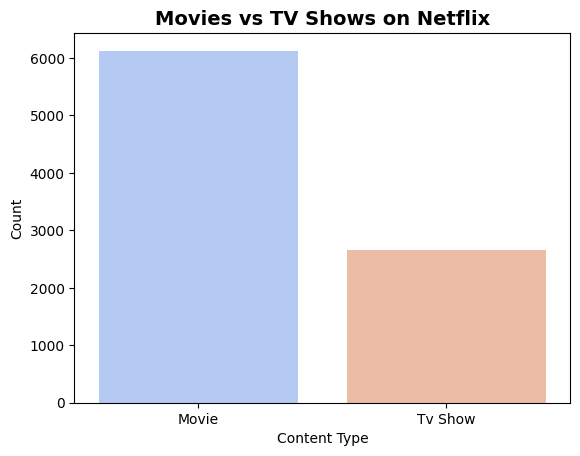

In [29]:
sns.countplot(
    x='type',
    data=df_clean,
    palette='coolwarm'
)

plt.title("Movies vs TV Shows on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

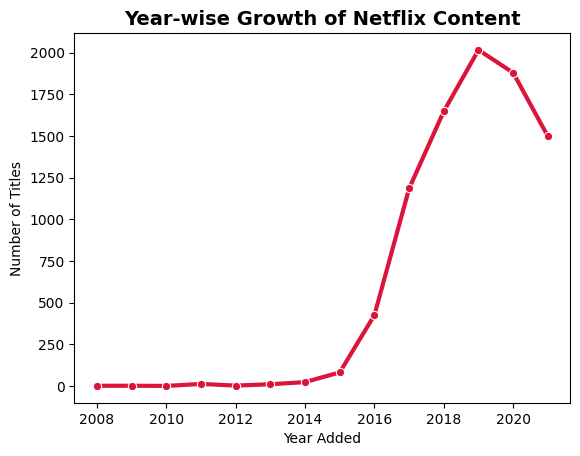

In [30]:
year_counts = df_clean['year_added'].value_counts().sort_index()

sns.lineplot(
    x=year_counts.index,
    y=year_counts.values,
    marker='o',
    linewidth=3,
    color='crimson'
)

plt.title("Year-wise Growth of Netflix Content", fontsize=14, fontweight='bold')
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

/tmp/ipython-input-3916243783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


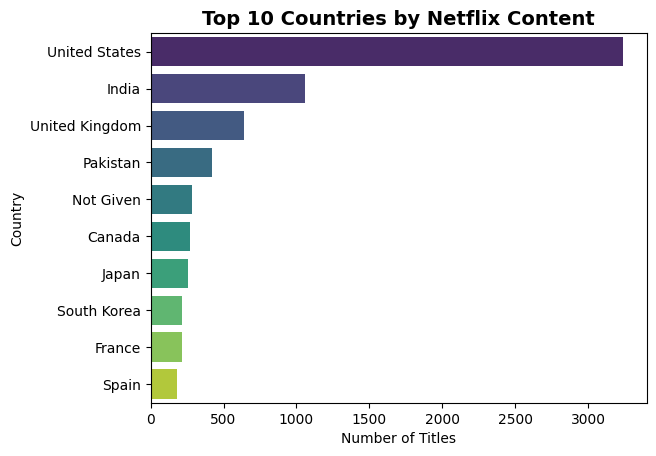

In [31]:
top_countries = df_clean['country'].value_counts().head(10)

sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette='viridis'
)

plt.title("Top 10 Countries by Netflix Content", fontsize=14, fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

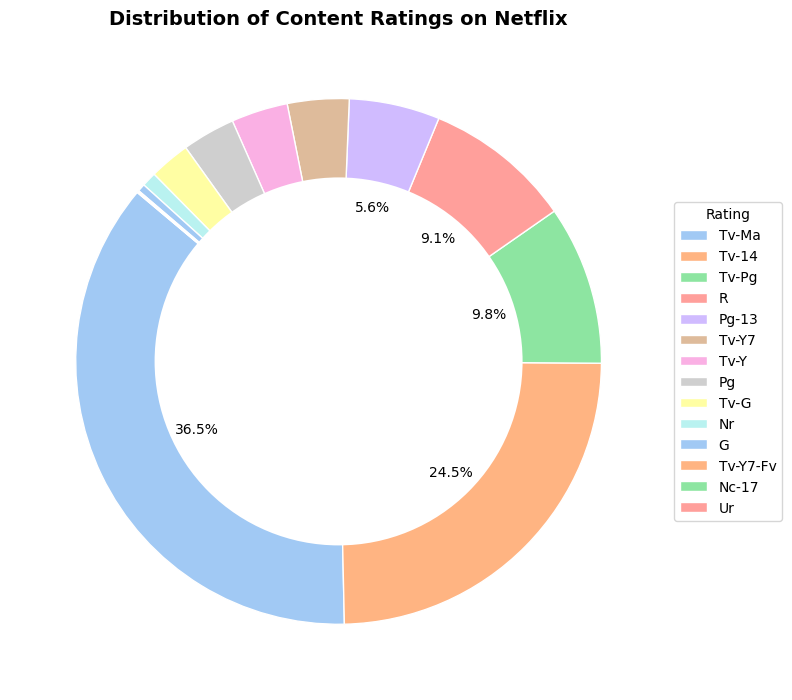

In [32]:
rating_counts = df_clean['rating'].value_counts()
colors = sns.color_palette("pastel")

def autopct_func(pct):
    return f'{pct:.1f}%' if pct > 5 else ''

plt.figure(figsize=(8,8))

wedges, _, _ = plt.pie(
    rating_counts,
    autopct=autopct_func,
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

centre_circle = plt.Circle((0,0), 0.7, fc='white')
plt.gca().add_artist(centre_circle)

plt.legend(
    wedges,
    rating_counts.index,
    title="Rating",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Distribution of Content Ratings on Netflix", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2686831965.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


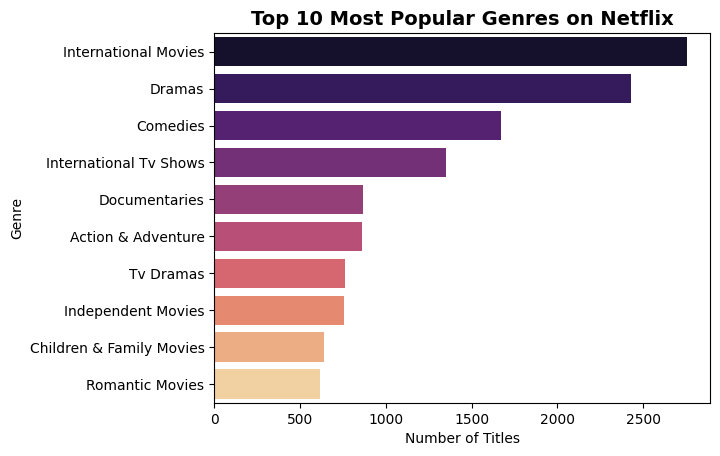

In [33]:
genres = df_clean['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)

sns.barplot(
    x=top_genres.values,
    y=top_genres.index,
    palette='magma'
)

plt.title("Top 10 Most Popular Genres on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

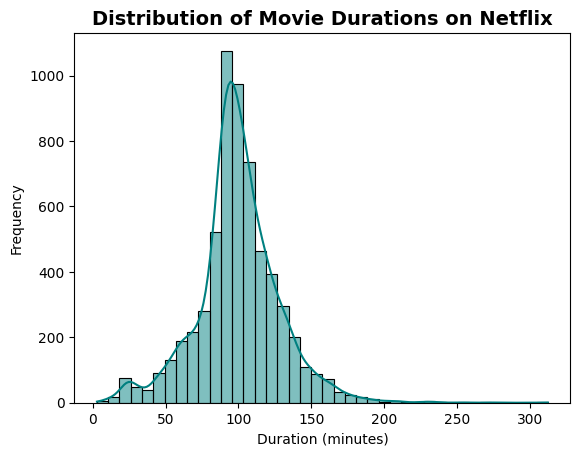

In [34]:
movie_duration = df_clean[df_clean['type'] == 'Movie']['duration_value']

sns.histplot(
    movie_duration,
    bins=40,
    kde=True,
    color='teal'
)

plt.title("Distribution of Movie Durations on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-3182046909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


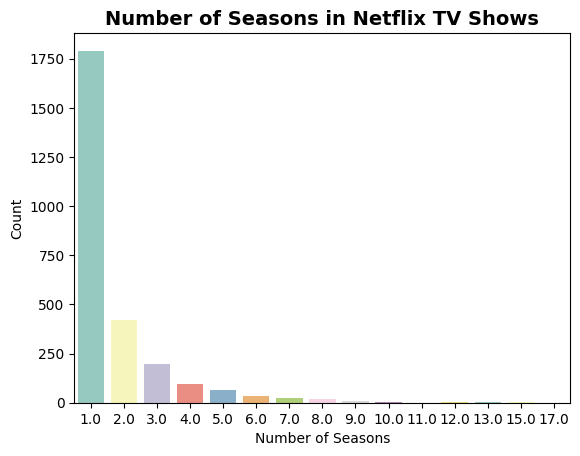

In [35]:
tv_seasons = df_clean[df_clean['type'] == 'Tv Show']['duration_value']

sns.countplot(
    x=tv_seasons,
    palette='Set3'
)

plt.title("Number of Seasons in Netflix TV Shows", fontsize=14, fontweight='bold')
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()

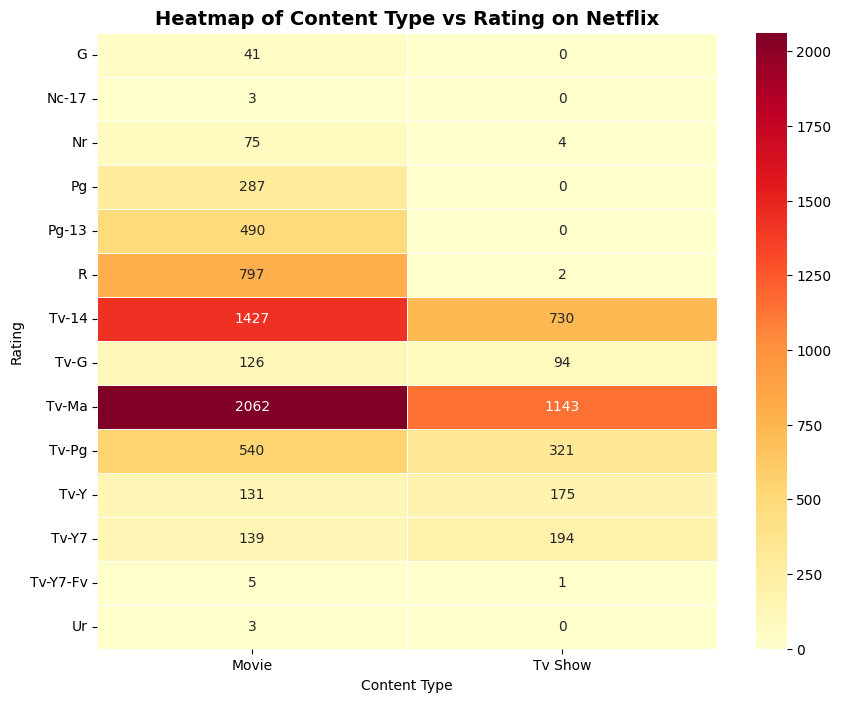

In [36]:
# Create a pivot table
heatmap_data = pd.crosstab(
    df_clean['rating'],
    df_clean['type']
)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='YlOrRd',
    linewidths=0.5
)

plt.title("Heatmap of Content Type vs Rating on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("Content Type")
plt.ylabel("Rating")
plt.show()